# Progress Report - Group 15

## Link to Github Repository
https://github.com/cs418-fa24/project-check-in-team-15 

## Project introduction
The issues that we are addressing with this project include ones that incorporate the inconsistencies of rhetoric of influential people when attempting to gain positions of power. We are analyzing how different politicians talk when they are on campaign and when they are not on campaign. We currently have the tweets of Donald Trump and are investigating the frequency of certain words and are determining the rhetoric that is displayed by it. 

## Any Changes 
We have scaled down slightly from our initial estimates of having thousands of politicians to choose from, to only include some of the more popular ones. For instance, we currently have the tweets of Trump, but we plan to incorporate the tweets of Kamala Harris, Barack Obama and Hillary Clinton. 

## Data Cleaning
We decided to scrape the tweets using the ScrapingDog API that gets the information for a tweet by any given user. We made API requests and were able to get a small sample size for the meanwhile, with more tweets and more data still to come in the coming weeks. 

In [ ]:
import csv
import requests

# Define the API key and base URL for the API request
api_key = 'key'
api_base_url = 'https://api.scrapingdog.com/twitter'

This will scrape tweets from Donald Trump when NOT campaigning ranging from 2017-2019 and save them into csv

In [ ]:
# Input CSV file containing tweet URLs
input_csv = 'donald_non_campaign_URLS.csv'

# Output CSV file to store fetched tweet data
output_csv = 'trump_non_campaign_data.csv'

# Define the headers for the output CSV file
csv_headers = [
    'views', 'retweets', 'quotes', 'likes', 'bookmarks', 'tweet', 
    'profile_picture', 'name', 'profile_handle', 'profile_url', 
    'tweet_timing', 'tweet_date', 'tweet_id', 'tweet_url'
]

# Read tweet URLs from the input CSV and fetch tweet data
with open(input_csv, mode='r') as infile, open(output_csv, mode='w', newline='', encoding='utf-8') as outfile:
    reader = csv.reader(infile)
    writer = csv.DictWriter(outfile, fieldnames=csv_headers)
    
    writer.writeheader()
    
    for row in reader:
        tweet_url = row[0]
        
        # Prepare parameters for the API request
        params = {
            'api_key': api_key,
            'url': tweet_url,
            'parsed': 'true'
        }
        
        # Make the API request
        response = requests.get(api_base_url, params=params)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Parse the JSON response
            response_data = response.json()
            
            if response_data and len(response_data) > 1:
                tweet_info = response_data[1]
                
                # Write tweet data to the CSV file
                writer.writerow({
                    'views': tweet_info.get('views'),
                    'retweets': tweet_info.get('retweets'),
                    'quotes': tweet_info.get('quotes'),
                    'likes': tweet_info.get('likes'),
                    'bookmarks': tweet_info.get('bookmarks'),
                    'tweet': tweet_info.get('tweet'),
                    'profile_picture': tweet_info.get('profile_picture'),
                    'name': tweet_info.get('name'),
                    'profile_handle': tweet_info.get('profile_handle'),
                    'profile_url': tweet_info.get('profile_url'),
                    'tweet_timing': tweet_info.get('tweet_timing'),
                    'tweet_date': tweet_info.get('tweet_date'),
                    'tweet_id': tweet_info.get('tweet_id'),
                    'tweet_url': tweet_info.get('tweet_url')
                })
            else:
                print(f"No data for URL: {tweet_url}")
        else:
            print(f"Request failed for URL: {tweet_url} with status code: {response.status_code}")

This will scrape tweets from Donald Trump DURING campaigning ranging from 2019-2021 and save them into csv

In [ ]:
# Input CSV file containing tweet URLs
input_csv = 'donald_campaign_URLS.csv'

# Output CSV file to store fetched tweet data
output_csv = 'trump_campaign_data.csv'

# Define the headers for the output CSV file
csv_headers = [
    'views', 'retweets', 'quotes', 'likes', 'bookmarks', 'tweet', 
    'profile_picture', 'name', 'profile_handle', 'profile_url', 
    'tweet_timing', 'tweet_date', 'tweet_id', 'tweet_url'
]

# Read tweet URLs from the input CSV and fetch tweet data
with open(input_csv, mode='r') as infile, open(output_csv, mode='w', newline='', encoding='utf-8') as outfile:
    reader = csv.reader(infile)
    writer = csv.DictWriter(outfile, fieldnames=csv_headers)
    
    # Write the header row to the output CSV file
    writer.writeheader()
    
    for row in reader:
        tweet_url = row[0]
        
        params = {
            'api_key': api_key,
            'url': tweet_url,
            'parsed': 'true'
        }
        
        response = requests.get(api_base_url, params=params)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Parse the JSON response
            response_data = response.json()
            
            # Extract tweet data if available
            if response_data and len(response_data) > 1:
                tweet_info = response_data[1]
                
                # Write tweet data to the CSV file
                writer.writerow({
                    'views': tweet_info.get('views'),
                    'retweets': tweet_info.get('retweets'),
                    'quotes': tweet_info.get('quotes'),
                    'likes': tweet_info.get('likes'),
                    'bookmarks': tweet_info.get('bookmarks'),
                    'tweet': tweet_info.get('tweet'),
                    'profile_picture': tweet_info.get('profile_picture'),
                    'name': tweet_info.get('name'),
                    'profile_handle': tweet_info.get('profile_handle'),
                    'profile_url': tweet_info.get('profile_url'),
                    'tweet_timing': tweet_info.get('tweet_timing'),
                    'tweet_date': tweet_info.get('tweet_date'),
                    'tweet_id': tweet_info.get('tweet_id'),
                    'tweet_url': tweet_info.get('tweet_url')
                })
            else:
                print(f"No data for URL: {tweet_url}")
        else:
            print(f"Request failed for URL: {tweet_url} with status code: {response.status_code}")

The code above results in two datasets. Trump's tweets from non-campaign and tweets during campaign. 

## Exploratory Data Analysis
data analysis here

Tone Summary (Before Election):
tweet
Negative    25
Positive    15
Neutral      8
Name: count, dtype: int64

Tone Summary (After Election):
tweet
Positive    55
Negative    41
Neutral     22
Name: count, dtype: int64

Most Common Words Before Election:
[('great', 11), ('work', 6), ('fake', 5), ('win', 4), ('nervous', 4), ('terrible', 3), ('good', 3), ('fraud', 3), ('supreme', 3), ('criminal', 3)]

Most Common Words After Election:
[('great', 29), ('better', 8), ('best', 8), ('win', 8), ('fake', 7), ('strong', 7), ('crime', 7), ('work', 7), ('bad', 5), ('collusion', 5)]


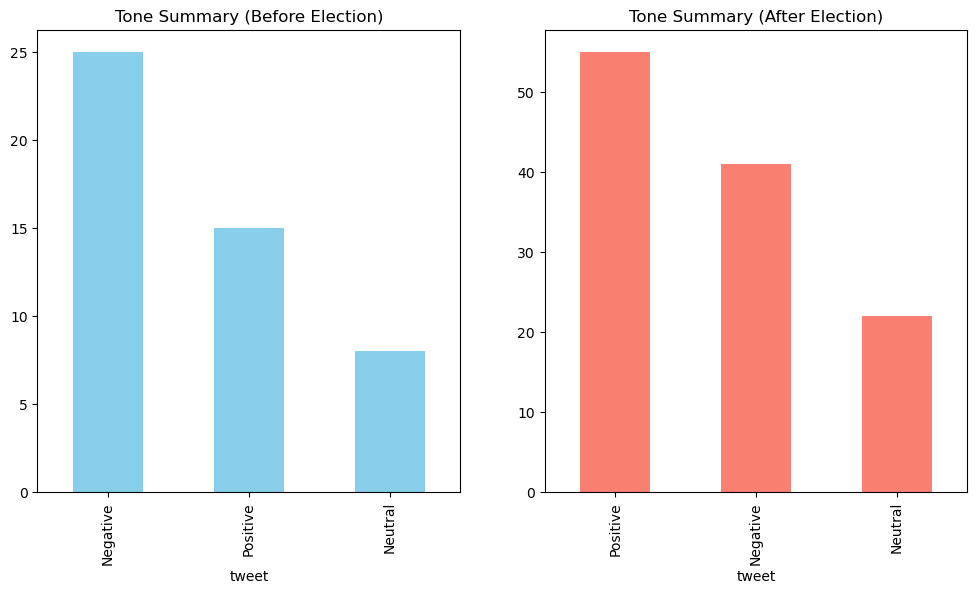

In [2]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

def load_sentiment_words(positive_file, negative_file):
    positive_words = pd.read_csv(positive_file, header=None).squeeze().str.strip().tolist()
    negative_words = pd.read_csv(negative_file, header=None).squeeze().str.strip().tolist()
    return positive_words, negative_words

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

def analyze_tone(tweet, positive_words, negative_words):
    words = clean_text(tweet).split()
    positive_count = sum(word in positive_words for word in words)
    negative_count = sum(word in negative_words for word in words)
    total_words = len(words)
    
    if total_words == 0:
        return "Neutral"
    
    if positive_count > negative_count:
        return "Positive"
    elif negative_count > positive_count:
        return "Negative"
    else:
        return "Neutral"

def get_word_frequency(tweets, positive_words, negative_words):
    all_words = []
    for tweet in tweets:
        words = clean_text(tweet).split()
        filtered_words = [word for word in words if word in positive_words or word in negative_words]
        all_words.extend(filtered_words)
    return Counter(all_words)

def analyze_tweets(file_path, positive_words, negative_words):
    df = pd.read_csv(file_path)
    tweets = df['tweet']
    tones = tweets.apply(lambda tweet: analyze_tone(tweet, positive_words, negative_words))
    word_frequency = get_word_frequency(tweets, positive_words, negative_words)
    
    tone_summary = tones.value_counts()
    return tone_summary, word_frequency

def compare_tweets(before_file, after_file, positive_words, negative_words):
    before_tone, before_word_freq = analyze_tweets(before_file, positive_words, negative_words)
    after_tone, after_word_freq = analyze_tweets(after_file, positive_words, negative_words)
    
    print("Tone Summary (Before Election):")
    print(before_tone)
    print("\nTone Summary (After Election):")
    print(after_tone)
    
    print("\nMost Common Words Before Election:")
    print(before_word_freq.most_common(10))
    print("\nMost Common Words After Election:")
    print(after_word_freq.most_common(10))

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    before_tone.plot(kind='bar', ax=ax[0], color='skyblue', title="Tone Summary (Before Election)")
    after_tone.plot(kind='bar', ax=ax[1], color='salmon', title="Tone Summary (After Election)")
    plt.show()

def main():
    positive_file = "positive_words_list.csv"
    negative_file = "negative_words_list.csv"
    
    positive_words, negative_words = load_sentiment_words(positive_file, negative_file)
    
    candidate = input("Enter a candidate name (Donald Trump or Kamala Harris): ")
    if candidate.lower() == "donald trump":
        before_file = "trump_campaign_data.csv"
        after_file = "trump_non_campaign_data.csv"
    elif candidate.lower() == "kamala harris":
        before_file = "harris_before.csv"
        after_file = "harris_after.csv"
    else:
        print("Invalid candidate name. Please enter 'Donald Trump' or 'Kamala Harris'.")
        return
    
    compare_tweets(before_file, after_file, positive_words, negative_words)

if __name__ == "__main__":
    main()


## At least one visualization
The refinement of the above code allows for a nice visualization of data 

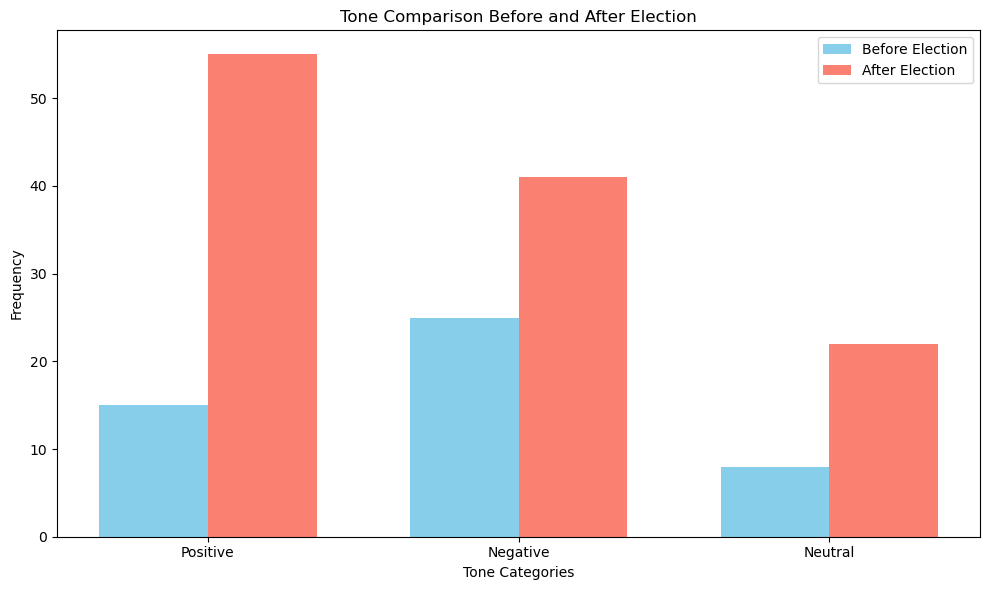

In [3]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

def load_sentiment_words(positive_file, negative_file):
    positive_words = pd.read_csv(positive_file, header=None).squeeze().str.strip().tolist()
    negative_words = pd.read_csv(negative_file, header=None).squeeze().str.strip().tolist()
    return positive_words, negative_words

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

def analyze_tone(tweet, positive_words, negative_words):
    words = clean_text(tweet).split()
    positive_count = sum(word in positive_words for word in words)
    negative_count = sum(word in negative_words for word in words)
    total_words = len(words)
    
    if total_words == 0:
        return "Neutral"
    
    if positive_count > negative_count:
        return "Positive"
    elif negative_count > positive_count:
        return "Negative"
    else:
        return "Neutral"

def get_word_frequency(tweets, positive_words, negative_words):
    all_words = []
    for tweet in tweets:
        words = clean_text(tweet).split()
        filtered_words = [word for word in words if word in positive_words or word in negative_words]
        all_words.extend(filtered_words)
    return Counter(all_words)

def analyze_tweets(file_path, positive_words, negative_words):
    df = pd.read_csv(file_path)
    tweets = df['tweet']
    tones = tweets.apply(lambda tweet: analyze_tone(tweet, positive_words, negative_words))
    word_frequency = get_word_frequency(tweets, positive_words, negative_words)
    
    tone_summary = tones.value_counts()
    return tone_summary, word_frequency

def compare_tweets(before_file, after_file, positive_words, negative_words):
    before_tone, before_word_freq = analyze_tweets(before_file, positive_words, negative_words)
    after_tone, after_word_freq = analyze_tweets(after_file, positive_words, negative_words)
    
    tone_categories = ["Positive", "Negative", "Neutral"]
    before_counts = [before_tone.get(tone, 0) for tone in tone_categories]
    after_counts = [after_tone.get(tone, 0) for tone in tone_categories]

    bar_width = 0.35
    index = range(len(tone_categories))

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(index, before_counts, bar_width, label='Before Election', color='skyblue')
    ax.bar([i + bar_width for i in index], after_counts, bar_width, label='After Election', color='salmon')
    
    ax.set_xlabel('Tone Categories')
    ax.set_ylabel('Frequency')
    ax.set_title('Tone Comparison Before and After Election')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(tone_categories)
    ax.legend()

    plt.tight_layout()
    plt.show()


def main():
    positive_file = "positive_words_list.csv"
    negative_file = "negative_words_list.csv"
    
    positive_words, negative_words = load_sentiment_words(positive_file, negative_file)
    
    candidate = input("Enter a candidate name (Donald Trump or Kamala Harris): ")
    if candidate.lower() == "donald trump":
        before_file = "trump_campaign_data.csv"
        after_file = "trump_non_campaign_data.csv"
    elif candidate.lower() == "kamala harris":
        before_file = "harris_before.csv"
        after_file = "harris_after.csv"
    else:
        print("Invalid candidate name. Please enter 'Donald Trump' or 'Kamala Harris'.")
        return
    
    compare_tweets(before_file, after_file, positive_words, negative_words)

if __name__ == "__main__":
    main()


## At least one ML analysis on your dataset
We decided to go with a sentiment classifier for individual tweets. We can train to classify tweets based on the words that they use. We are using sklearn.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [6]:
def load_and_label_data(file_path, positive_words, negative_words):
    df = pd.read_csv(file_path)
    tweets = df['tweet']
    df['label'] = tweets.apply(lambda tweet: analyze_tone(tweet, positive_words, negative_words))
    return df[['tweet', 'label']]

In [ ]:
def train_classifier(df):
    X = df['tweet']
    y = df['label']
    
    vectorizer = CountVectorizer(stop_words='english')
    X_vectorized = vectorizer.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)
    
    model = MultinomialNB()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))
    
    return model, vectorizer

In [ ]:
def load_sentiment_words(positive_file, negative_file):
    positive_words = pd.read_csv(positive_file, header=None).squeeze().str.strip().tolist()
    negative_words = pd.read_csv(negative_file, header=None).squeeze().str.strip().tolist()
    return positive_words, negative_words

positive_file = "positive_words_list.csv"
negative_file = "negative_words_list.csv"
positive_words, negative_words = load_sentiment_words(positive_file, negative_file)

In [ ]:
before_file = "trump_campaign_data.csv"
before_df = load_and_label_data(before_file, positive_words, negative_words)

# Train
model, vectorizer = train_classifier(before_df)

Accuracy: 0.30
              precision    recall  f1-score   support

    Negative       0.33      0.17      0.22         6
     Neutral       0.40      0.67      0.50         3
    Positive       0.00      0.00      0.00         1

    accuracy                           0.30        10
   macro avg       0.24      0.28      0.24        10
weighted avg       0.32      0.30      0.28        10



In [ ]:
after_file = "trump_non_campaign_data.csv"
after_df = pd.read_csv(after_file)
after_tweets = after_df['tweet']

after_tweets_vectorized = vectorizer.transform(after_tweets)
after_predictions = model.predict(after_tweets_vectorized)

result_df = pd.DataFrame({'tweet': after_tweets, 'predicted_label': after_predictions})
print(result_df.head())

                                               tweet predicted_label
0  The Manufacturing Index rose to 59%, the highe...        Positive
1  Senator Luther Strange has gone up a lot in th...        Positive
2  Great interview on @foxandfriends with the par...        Positive
3  Since Congress can't get its act together on H...        Negative
4  Stock Market has increased by 5.2 Trillion dol...        Negative


## Reflection

What is the hardest part of the project that you've encountered so far?<br>
--The most difficult part of the project so far would be the analysis of the data. With many possibilities it's difficult to stick with one direction.

What are your initial insights?<br>
--Initial insights include being able to know generally how politicians behave during election time.

Are there any concrete results you can show at this point? If not, why not?<br>
--There are a couple interesting results so far. We have realized that when looking at Trump's numbers, he seems to use more of the negative and positive words after election. He's simply using more descriptive words. 

Going forward, what are the current biggest problems you're facing?<br>
--Issues we face are the creating new ways to analyze the data.

Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?<br>
--We need to gather more data and clean it so that it can be better suited for the visualizations. 

Given your initial exploration of the data, is it worth proceeding with your project? Why? If not, how are you going to change your project and why do you think it's better than your current results?<br>
--We will be going forward with this project. We've concluded there is a lot to learn still with presidential candidates. 


## Roles/Coordination(Important)
Here is a breakdown on what each person worked on. We are coordinating different roles to each other and assigning tasks accordingly.

Orlando - Responsible for finding data sources, cleaning, progress report<br>
Abderrahmane - Responsible for data analysis of tweets to set up for visualization<br>
Blaine - Responsible for partial sponsor in attaining tweet scraping API<br>
Ahmed - Responsible for data visualization and attaining tweet scraping API

## Next Steps
The next steps for the group would be to gather more data and further refine the cleaning of said data. Next steps is to create more graphs and allow for more interesting data visualization. We realized soon that the scope of the project will have to be evaluated. 